In [1]:
import pandas as pd
from ultralytics import YOLO
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
small_df = pd.read_pickle('../ladybird_train_small_preprocessed.pkl')

In [4]:
sample_df = small_df[:50]

In [15]:
# Setup directories

train_images_dir = "train/images"
train_boxes_dir = "train/labels"
train_corrected_images_dir = "train/train_corrected"
val_images_dir = "val/images"
val_boxes_dir = "val/labels"
val_corrected_images_dir = "val/val_corrected"
test_images_dir = "_test/images"
test_predictions_dir = "_test/predictions"

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_boxes_dir, exist_ok=True)
os.makedirs(train_corrected_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_boxes_dir, exist_ok=True)
os.makedirs(val_corrected_images_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)

In [6]:
# Get image arrays from the df and save them as images into the train folder
def save_images(df, output_dir):
    file_paths = []
    for idx, row in df.iterrows():
        img_array = row['image_array']
        img = Image.fromarray((img_array * 255).astype(np.uint8))  # Convert float arrays (0-1) to uint8 (0-255)
        file_path = os.path.join(output_dir, f"image_{idx}.jpg")
        img.save(file_path)
        file_paths.append(file_path)
    return file_paths

image_paths = save_images(sample_df, train_images_dir)

In [7]:
# I used LabelImg to manually annotate the images. A label (e.g. in train/labels/image_0.txt) looks like this: 0 0.555804 0.513393 0.343750 0.357143 (class_id, x_center, y_center, box_width, box_height)
# The images with manually drawn bounding boxes are saved in the train/train_corrected folder and val/val_corrected folder

def overlay_bounding_boxes(image_path, annotation_path, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Read the original image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image {image_path}")
        return

    h, w, _ = img.shape  # Image dimensions

    # Read the annotation file
    with open(annotation_path, "r") as file:
        lines = file.readlines()

    for line in lines:
        # Parse the YOLO annotation
        class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())

        # Convert normalized coordinates to pixel values
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Draw the bounding box on the image
        color = (0, 255, 0)  # Green color for the bounding box
        thickness = 2  # Line thickness
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

    # Save the image with overlayed bounding boxes
    save_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(save_path, img)
    print(f"Saved corrected image to {save_path}")

In [8]:
# Overlay bounding boxes on the training images and save them to train/train_corrected

for image_filename in os.listdir(train_images_dir):
    if image_filename.endswith(".jpg"):  # Ensure we only process images
        image_path = os.path.join(train_images_dir, image_filename)
        annotation_path = os.path.join(train_boxes_dir, image_filename.replace(".jpg", ".txt"))

        # Check if annotation file exists
        if os.path.exists(annotation_path):
            overlay_bounding_boxes(image_path, annotation_path, train_corrected_images_dir)
        else:
            print(f"No annotation found for {image_filename}. Skipping.")

Saved corrected image to train/train_corrected/image_15.jpg
Saved corrected image to train/train_corrected/image_29.jpg
Saved corrected image to train/train_corrected/image_28.jpg
Saved corrected image to train/train_corrected/image_14.jpg
Saved corrected image to train/train_corrected/image_16.jpg
Saved corrected image to train/train_corrected/image_17.jpg
Saved corrected image to train/train_corrected/image_13.jpg
Saved corrected image to train/train_corrected/image_12.jpg
Saved corrected image to train/train_corrected/image_38.jpg
Saved corrected image to train/train_corrected/image_10.jpg
Saved corrected image to train/train_corrected/image_11.jpg
Saved corrected image to train/train_corrected/image_39.jpg
Saved corrected image to train/train_corrected/image_8.jpg
Saved corrected image to train/train_corrected/image_49.jpg
Saved corrected image to train/train_corrected/image_48.jpg
Saved corrected image to train/train_corrected/image_9.jpg
Saved corrected image to train/train_corre

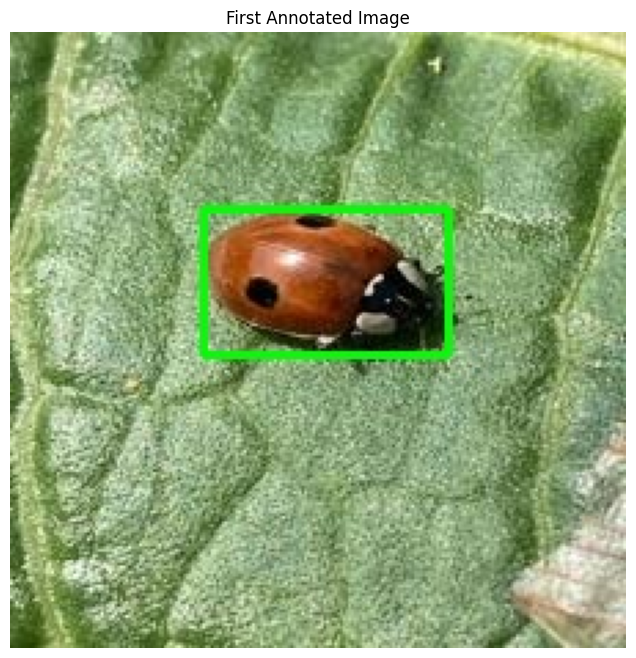

In [9]:
# Plot the first annotated image in the notebook
first_image_path = os.path.join(train_corrected_images_dir, os.path.basename(image_paths[-1]))
annotated_image = Image.open(first_image_path)

plt.figure(figsize=(8, 8))
plt.imshow(annotated_image)
plt.axis("off")
plt.title("First Annotated Image")
plt.show()

In [10]:
# Get the next 50 images as validation data
val_df = small_df[51:100]
val_df.reset_index(drop=True, inplace=True)

In [11]:
# Save the image arrays as jpg files in the val/images folder
val_image_paths = save_images(val_df, val_images_dir)

In [12]:
# Again manually annotate and draw bounding boxes on them
for image_filename in os.listdir(val_images_dir):
    if image_filename.endswith(".jpg"):  # Ensure we only process images
        image_path = os.path.join(val_images_dir, image_filename)
        annotation_path = os.path.join(val_boxes_dir, image_filename.replace(".jpg", ".txt"))

        # Check if annotation file exists
        if os.path.exists(annotation_path):
            overlay_bounding_boxes(image_path, annotation_path, val_corrected_images_dir)
        else:
            print(f"No annotation found for {image_filename}. Skipping.")

Saved corrected image to val/val_corrected/image_15.jpg
Saved corrected image to val/val_corrected/image_29.jpg
Saved corrected image to val/val_corrected/image_28.jpg
Saved corrected image to val/val_corrected/image_14.jpg
Saved corrected image to val/val_corrected/image_16.jpg
Saved corrected image to val/val_corrected/image_17.jpg
Saved corrected image to val/val_corrected/image_13.jpg
Saved corrected image to val/val_corrected/image_12.jpg
Saved corrected image to val/val_corrected/image_38.jpg
Saved corrected image to val/val_corrected/image_10.jpg
Saved corrected image to val/val_corrected/image_11.jpg
Saved corrected image to val/val_corrected/image_39.jpg
Saved corrected image to val/val_corrected/image_8.jpg
Saved corrected image to val/val_corrected/image_48.jpg
Saved corrected image to val/val_corrected/image_9.jpg
Saved corrected image to val/val_corrected/image_2.jpg
Saved corrected image to val/val_corrected/image_43.jpg
Saved corrected image to val/val_corrected/image_42

In [20]:
# Train a YOLO model using the annotated train images. Then the model will predict the bounding boxes on the val images and compute the Mean Average Precision (mAP) score.
# The paths to these images are specified in data.yaml
model = YOLO('yolov8s.pt')
results = model.train(data='data.yaml', epochs=3, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.44 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.43 🚀 Python-3.10.6 torch-2.5.1 CPU (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

train: Scanning /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/train/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 2309.46it/s]

train: New cache created: /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/train/labels.cache



val: Scanning /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/val/labels... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<00:00, 2527.59it/s]

val: New cache created: /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/val/labels.cache
Plotting labels to runs/detect/train9/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2024/12/06 15:32:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/12/06 15:32:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(d950e048c145400189d3ae9349060402) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
MLflow: WARNING ⚠️ Failed to initialize: Changing param values is not allowed. Param with key='name' was already logged with value='train' for run ID='d950e048c145400189d3ae9349060402'. Attempted logging new value 'train9'.
MLflow: WARNING ⚠️ Not tracking this run
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train9
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.9862       4.19      1.262          5        640: 100%|██████████| 4/4 [00:38<00:00,  9.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.70s/it]

                   all         49         58       0.44      0.483      0.383      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.9388      2.549      1.181          5        640: 100%|██████████| 4/4 [00:39<00:00,  9.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.23s/it]

                   all         49         58      0.833      0.534       0.66      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.9973      2.192      1.237          5        640: 100%|██████████| 4/4 [00:37<00:00,  9.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.73s/it]

                   all         49         58      0.847      0.621      0.737      0.516



3 epochs completed in 0.050 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 22.5MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.43 🚀 Python-3.10.6 torch-2.5.1 CPU (Apple M1 Max)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.26s/it]


                   all         49         58      0.848      0.621      0.738      0.517
Speed: 0.5ms preprocess, 351.7ms inference, 0.0ms loss, 22.7ms postprocess per image
Results saved to runs/detect/train9
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


In [16]:
test_df = small_df[101:150]
test_df.reset_index(drop=True, inplace=True)
test_image_paths = save_images(test_df, test_images_dir)

In [17]:
best_model = YOLO('runs/detect/train9/weights/best.pt')

In [19]:
# Create the output folder if it doesn't exist
os.makedirs(test_predictions_dir, exist_ok=True)

# Run predictions and save images with bounding boxes
results = best_model.predict(source=test_images_dir, save=True, save_txt=False, conf=0.25)

# Move the saved images to the output folder
for result in results:
    plotted_image = result.plot()

    # Define output file path
    input_image_path = result.path
    image_name = os.path.basename(input_image_path)
    output_image_path = os.path.join(test_predictions_dir, image_name)

    # Save the image
    cv2.imwrite(output_image_path, cv2.cvtColor(plotted_image, cv2.COLOR_RGB2BGR))
    print(f"Saved predicted image to {output_image_path}")

print(f"All predicted images saved to {test_predictions_dir}")


image 1/49 /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/_test/images/image_0.jpg: 640x640 1 ladybird, 96.0ms
image 2/49 /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/_test/images/image_1.jpg: 640x640 (no detections), 71.2ms
image 3/49 /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/_test/images/image_10.jpg: 640x640 1 ladybird, 71.3ms
image 4/49 /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/_test/images/image_11.jpg: 640x640 (no detections), 86.8ms
image 5/49 /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/_test/images/image_12.jpg: 640x640 1 ladybird, 68.1ms
image 6/49 /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/_test/images/image_13.jpg: 640x640 1 ladybird, 60.6ms
image 7/49 /Users/kaimajerus/code/data-science-portfolio/ladybird-classification/yolo/_test/images/image_14.jpg: 640x640 1 ladybird, 66.2ms
image 8/49 

Next steps 
- label more images manually or automatically and then retrain YOLO with the additional images. Some of these go to train set and some to val set. 
- aim to improve the mAP against the validation set.
- Dont really need the test set. 
- Increase epochs
- Adjust learning rate
- higher img size
- Augmentation 
  - Horizontal/vertical flips
  - Color jittering
  - Random cropping
  - Mosaic or mixup augmentation (YOLOv8 supports these natively)
Try a larger model
- yolov8m.pt or yolov8l.pt